<h1 align="center"> Python Essentials: Data Visualization.</h1>

    <Name>
    <Class>
    <Date>

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy import special as sp

In [5]:
plt.rcParams["figure.dpi"] = 300     # Raise figure quality.

### Problem 1

The file `anscombe.npy` contains Anscombe’s quartet.
For each section of the quartet,
- Plot the data as a scatter plot on the box [0, 20] × [0, 13].
- Use `scipy.stats.linregress()` to calculate the slope and intercept of the least squares regression line for the data and its correlation coefficient (the first three return values).
- Plot the least squares regression line over the scatter plot on the domain $x\in[0,20]$.
- Report the mean and variance in $x$ and $y$, the slope and intercept of the regression line, and the correlation coefficient. Compare these statistics to those of the other sections.
- Describe how the section is similar to the others and how it is different.

StarWars
Mean X: 9.0
Mean Y: 7.500909090909093
Var X: 10.0
Var Y: 3.7520628099173554
Correlation Coffiecient: [[1.         0.81642052]
 [0.81642052 1.        ]]
Hamilton
Mean X: 9.0
Mean Y: 7.50090909090909
Var X: 10.0
Var Y: 3.752390082644628
Correlation Coffiecient: [[1.         0.81623651]
 [0.81623651 1.        ]]
JFK
Mean X: 9.0
Mean Y: 7.5
Var X: 10.0
Var Y: 3.747836363636364
Correlation Coffiecient: [[1.         0.81628674]
 [0.81628674 1.        ]]
Soviet Russia 
Mean X: 9.0
Mean Y: 7.500909090909091
Var X: 10.0
Var Y: 3.7484082644628103
Correlation Coffiecient: [[1.         0.81652144]
 [0.81652144 1.        ]]


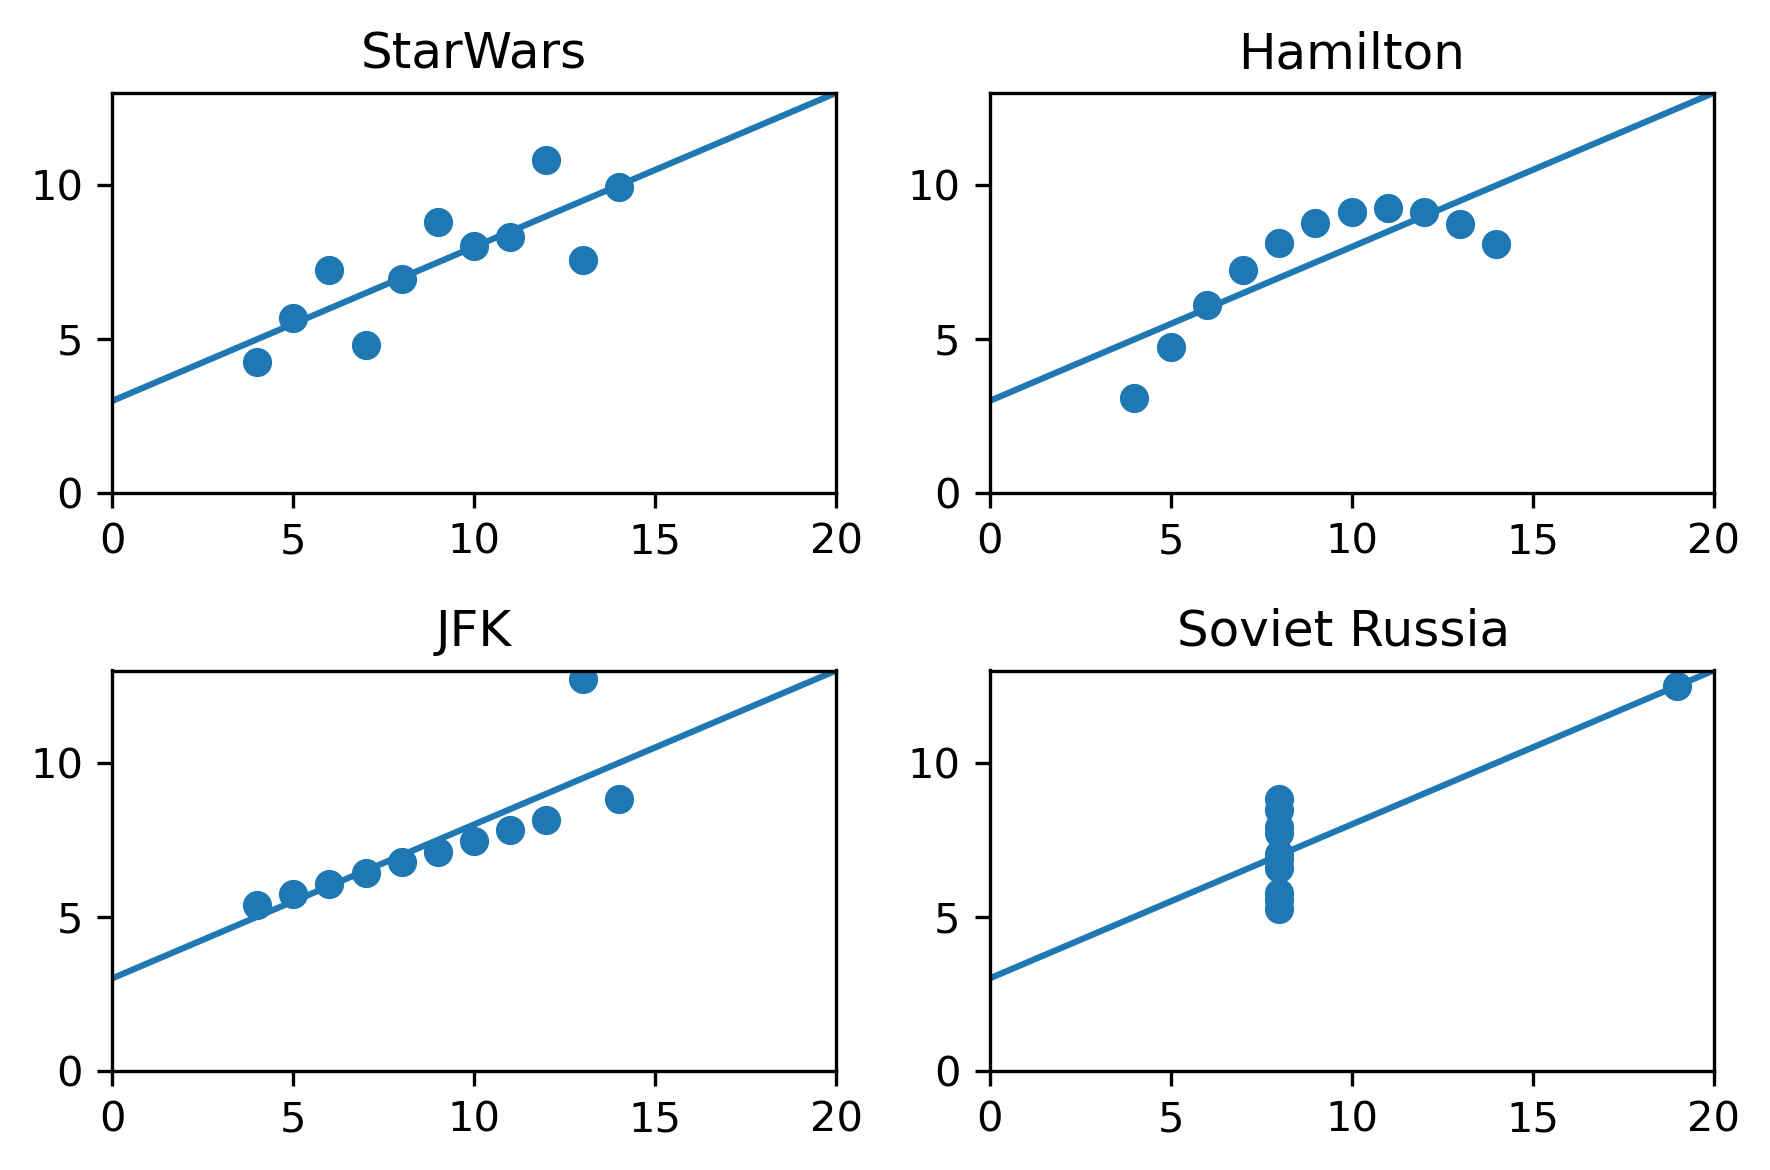

In [7]:

A = np.load("anscombe.npy")
plotTitles = ['StarWars', 'Hamilton', "JFK", "Soviet Russia "]
###PLOT GRAPHS
for i in range(4):
    X = A[:,i*2]
    Y = A[:,i*2 + 1]
    plt.subplot(2,2,i+1)
    plt.xlim(0, 20)
    plt.ylim(0, 13)
    plt.scatter(X, Y)
    
    line = stats.linregress(X,Y)
    x = np.linspace(0,20, 20)
    f = lambda x: line[0]*x  + line[1]
    plt.plot(x, f(x))
    plt.title(plotTitles[i])
    plt.tight_layout()
    print(plotTitles[i])
    print("Mean X: " + str(np.mean(X)))
    print("Mean Y: " + str(np.mean(Y)))
    print("Var X: " + str(np.var(X)))
    print("Var Y: " + str(np.var(Y)))
    print("Correlation Coffiecient: " + str(np.corrcoef(X,Y)))

### Problem 2
The $n + 1$ Bernstein basis polynomials of degree $n$ are defined as follows.

$$b_{n,v}(x) = \binom{n}{v}x^v(1-x)^{n-v},\quad v=0,\ 1,\ \ldots,\ n$$

Plot the first $10$ Bernstein basis polynomials ($n = 0,\ 1,\ 2,\ 3$) as small multiples on the domain $[0, 1] \times [0, 1]$.
Label the subplots for clarity, adjust tick marks and labels for simplicity, and set the window limits of
each plot to be the same.
Consider arranging the subplots so that the rows correspond with $n$ and the columns with $v$.

(Hint: The constant $\binom{n}{v} = \frac{n!}{v!(n-v)!}$ is called the binomial coefficient and can be efficiently computed with `scipy.special.binom()` or `scipy.misc.comb()`.)

<ipython-input-8-1f00cf11c16f>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i+1)
<ipython-input-8-1f00cf11c16f>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i+1)
<ipython-input-8-1f00cf11c16f>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retu

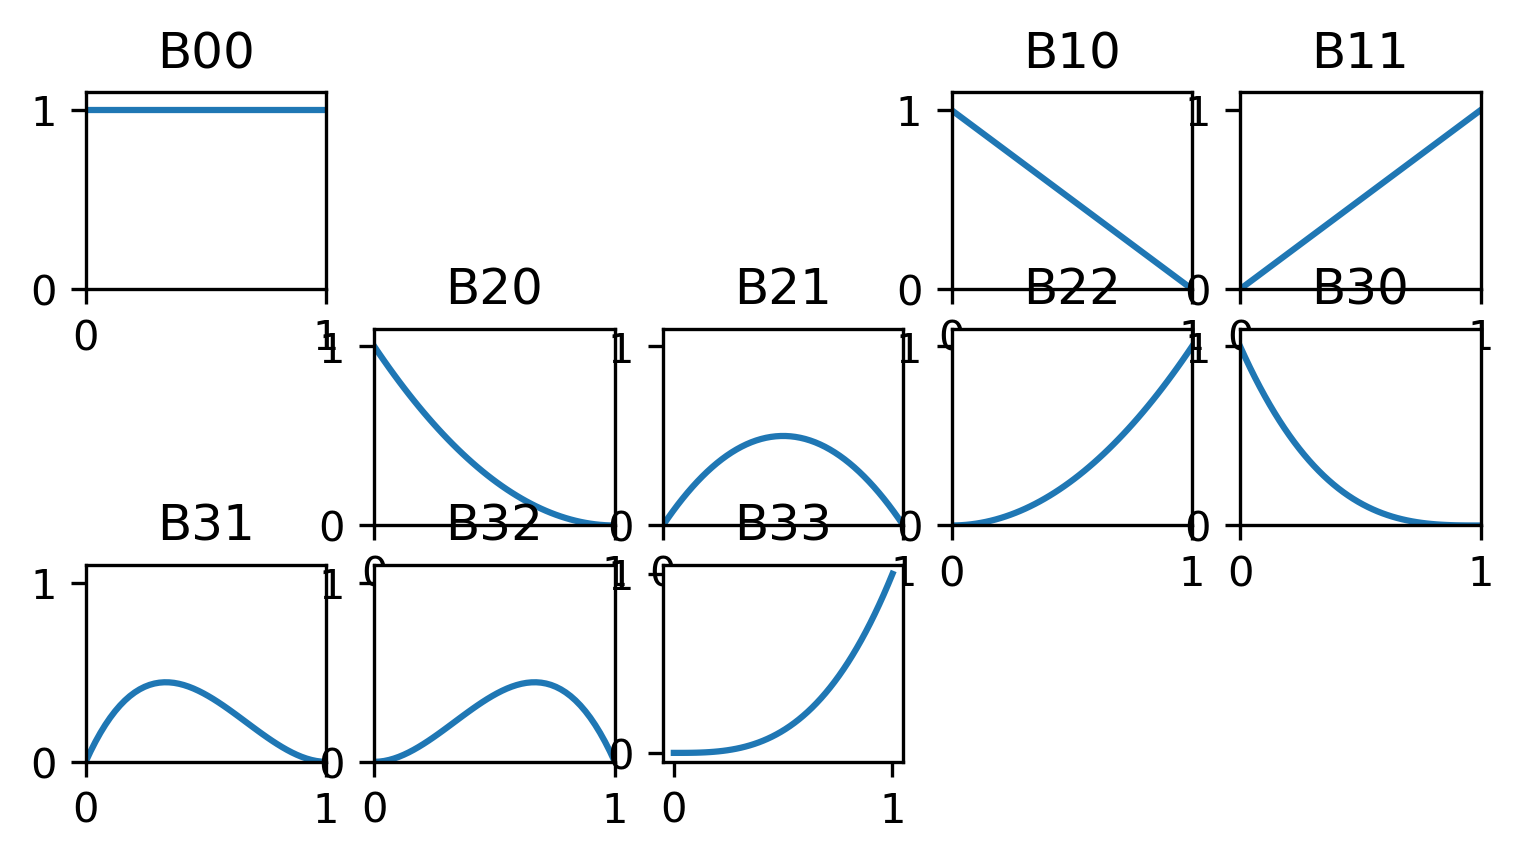

In [8]:
n= 10
#PLOT BERNSTEIN GRAPHS
for n in range(0,4):
    for v in range(0,n+1):
        plt.xlim(0, 1)
        plt.ylim(0, 1.1)
        x = np.linspace(0,1,50)
        f = lambda x: sp.binom(n, v) * x**v * (1-x)**(n-v)
        plt.subplot(2,2,i+1)
        plt.subplot(4, 5, n*3 + v + 1)
        plt.plot(x,f(x))
        plt.title("B" + str(n) + str(v))



### Problem 3

The file `MLB.npy` contains measurements from over 1,000 recent Major League Baseball players, compiled by UCLA.
Each row in the array represents a different player; the columns are the player’s height (in inches), weight (in pounds), and age (in years), in that order.

Create several visualizations to show the correlations between height, weight, and age in the MLB data set.
Use at least one scatter plot.
Adjust the marker size, plot a regression line, change the window limits, and use small multiples where appropriate.

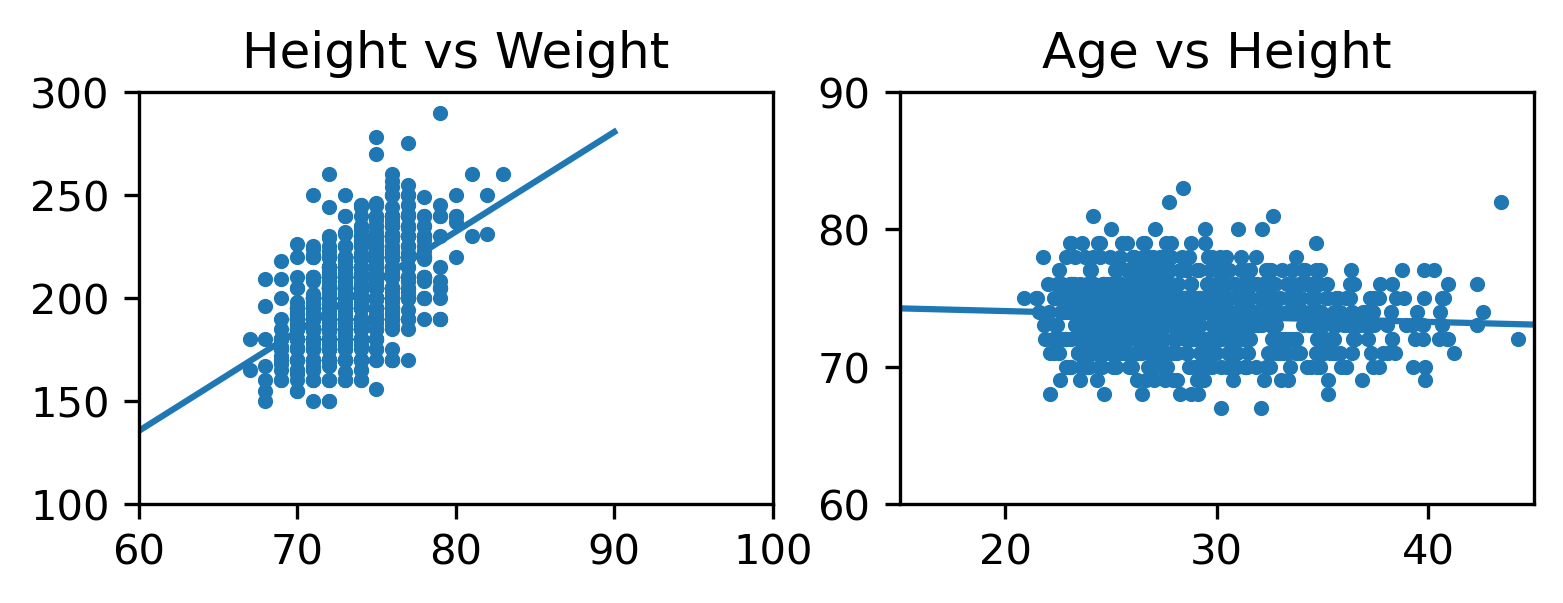

In [9]:
height, weight, age = np.load("MLB.npy").T

###PLOT GRAPHS
plt.subplot(2,2,1)
plt.xlim(60, 100)
plt.ylim(100, 300)
plt.title("Height vs Weight")
plt.scatter(height, weight,  marker='o',s=7)
line = stats.linregress(height, weight)
x = np.linspace(60,90, 20)
f = lambda x: line[0]*x  + line[1]
plt.plot(x, f(x))  

plt.subplot(2,2,2)
plt.xlim(15, 45)
plt.ylim(60, 90)
plt.title("Age vs Height")
plt.scatter(age, height,  marker='o',s=7)
line = stats.linregress(age, height)
x = np.linspace(15, 45, 20)
f = lambda x: line[0]*x  + line[1]
plt.plot(x, f(x)) 



### Problem 4

The file `earthquakes.npy` contains data from over 17,000 earthquakes between 2000 and 2010 that were at least a 5 on the Richter scale.
Each row in the array represents a different earthquake; the columns are the earthquake’s date (as a fraction of the year), magnitude (on the Richter scale), longitude, and latitude, in that order.

Describe the data with two or three visualizations, including line plots, scatter plots, and histograms as appropriate.
Your plots should answer the following questions:
1. How many earthquakes happened every year?
2. How often do stronger earthquakes happen compared to weaker ones?
3. Where do earthquakes happen? Where do the strongest earthquakes happen?

Hint: Use `plt.axis("equal")` or `ax.set_aspect("equal")` to fix the aspect ratio, which may improve comparisons between longitude and latitude.

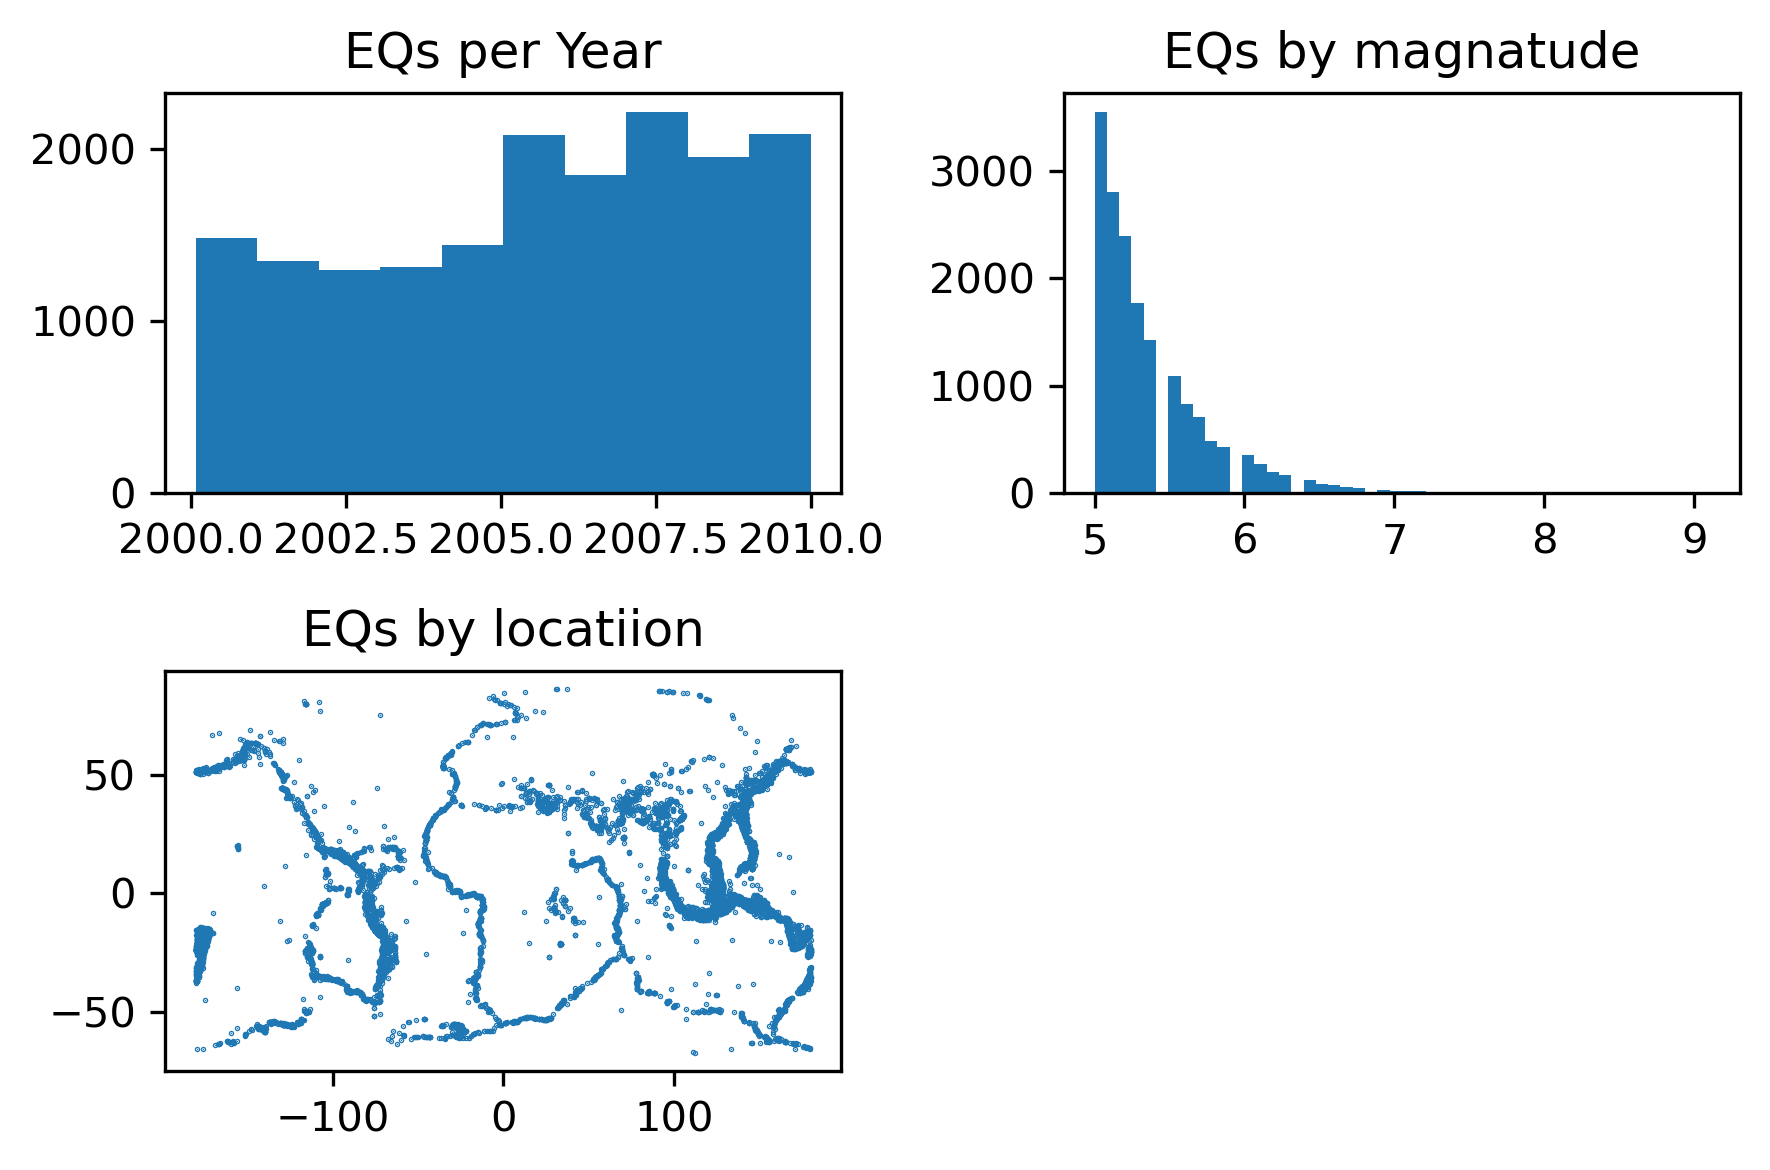

In [10]:
years, Magnitude, longitude, latitude = np.load("earthquakes.npy").T

###PLOT GRAPHS
plt.subplot(2,2,1)
plt.title("EQs per Year")
plt.hist(years, bins = 10)
plt.tight_layout()

plt.subplot(2,2,2)
plt.title("EQs by magnatude")
plt.hist(Magnitude, bins = 50)
plt.tight_layout()

plt.subplot(2,2,3)
plt.title("EQs by locatiion")
plt.scatter(longitude, latitude, s=.1)
plt.tight_layout()



### Problem 5

The _Rosenbrock function_ is defined as follows. $$f(x,y)=(1−x)^2 +100(y−x^2)^2$$
The minimum value of $f$ is $0$, which occurs at the point $(1, 1)$ at the bottom of a steep, banana-shaped valley of the function.

Use a heat map and a contour plot to visualize the Rosenbrock function.
Plot the minimizer $(1, 1)$.
Use a different sequential colormap for each visualization.

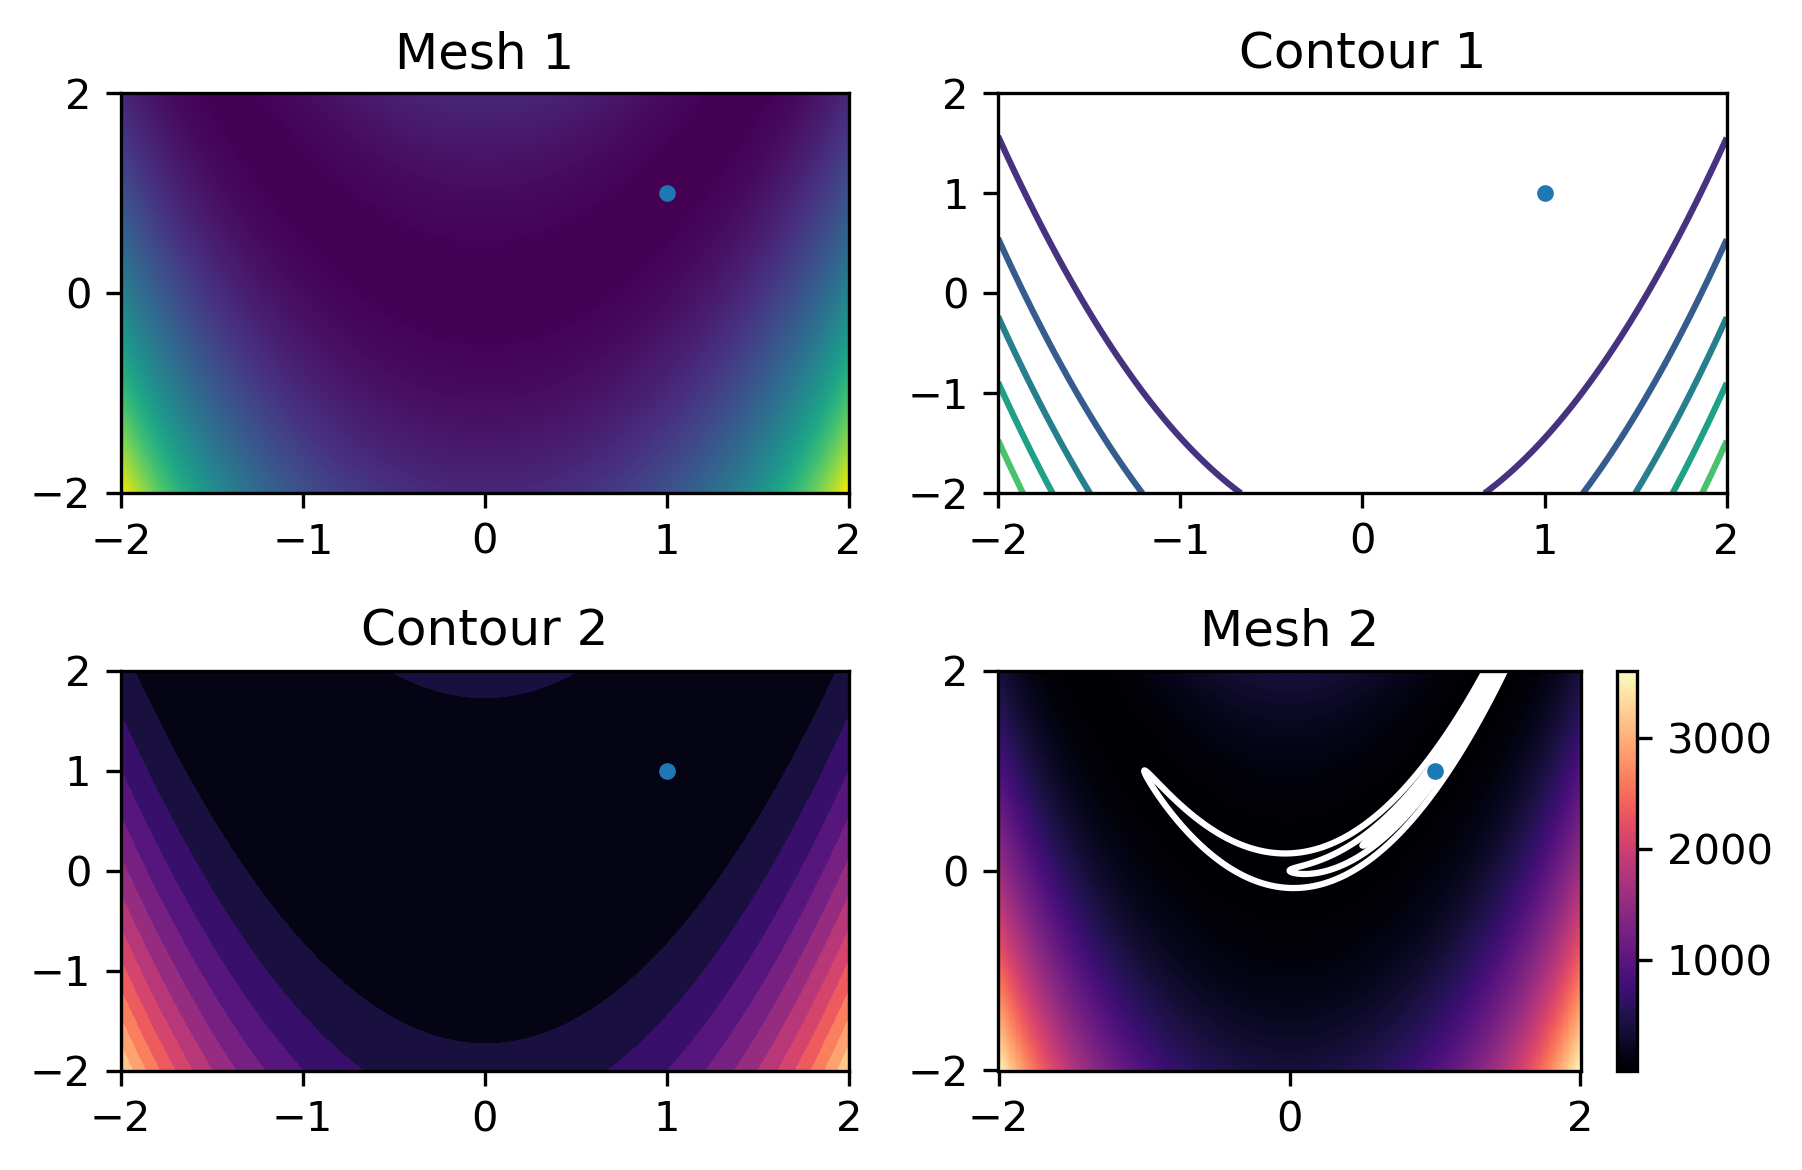

In [18]:
x = np.linspace(0-2, 0+2, 500)
X, Y = np.meshgrid(x, x)
Z = (1-X)**2 + 100 * (Y - X**2)**2
###PLOT the Graphs 
fig, ax = plt.subplots(2,2)
ax[0,0].pcolormesh(X, Y, Z, cmap="viridis", shading='auto') # Heat map.
ax[0,0].set_title("Mesh 1")
ax[0,0].plot(1,1, '.')
ax[0,1].plot(1,1, '.')
ax[0,1].contour(X, Y, Z, 6, cmap="viridis") # Contour map.
ax[0,1].set_title("Contour 1")
ax[1,0].contourf(X, Y, Z, 12, cmap="magma")
ax[1,0].set_title("Contour 2") # Filled contour map.
ax[1,0].plot(1,1, '.')

# Plot specific level curves and a heat map with a colorbar.
ax[1,1].contour(X, Y, Z, [-1, -.25, 0, .25, 1, 4], colors="white")
ax[1,1].plot(1,1, '.')
ax[1,1].set_title("Mesh 2")
plt.tight_layout()
cax = ax[1,1].pcolormesh(X, Y, Z, cmap="magma", shading='auto')
fig.colorbar(cax, ax=ax[1,1])
plt.show()

### Problem 6

The file `countries.npy` contains information from 20 different countries.
Each row in the array represents a different country; the columns are the 2015 population (in millions of people), the 2015 GDP (in billions of US dollars), the average male height (in centimeters), and the average female height (in centimeters), in that order.

Visualize this data set with at least four plots, using at least one scatter plot, one histogram, and one bar chart.
List the major insights that your visualizations reveal.

(Hint: consider using `np.argsort()` and fancy indexing to sort the data for the bar chart.)

In [12]:
countries = np.array(
            ["Austria", "Bolivia", "Brazil", "China", "Finland",
             "Germany", "Hungary", "India", "Japan", "North Korea",
             "Montenegro", "Norway", "Peru", "South Korea", "Sri Lanka",
             "Switzerland", "Turkey", "United Kingdom", "United States", "Vietnam"])
population, gdp, male, female = np.load("countries.npy").T



China Has a lot of people. 
Larger populations have greater GDPs.
Most GDPs are below 5000 
females dont have an effect on gpd.


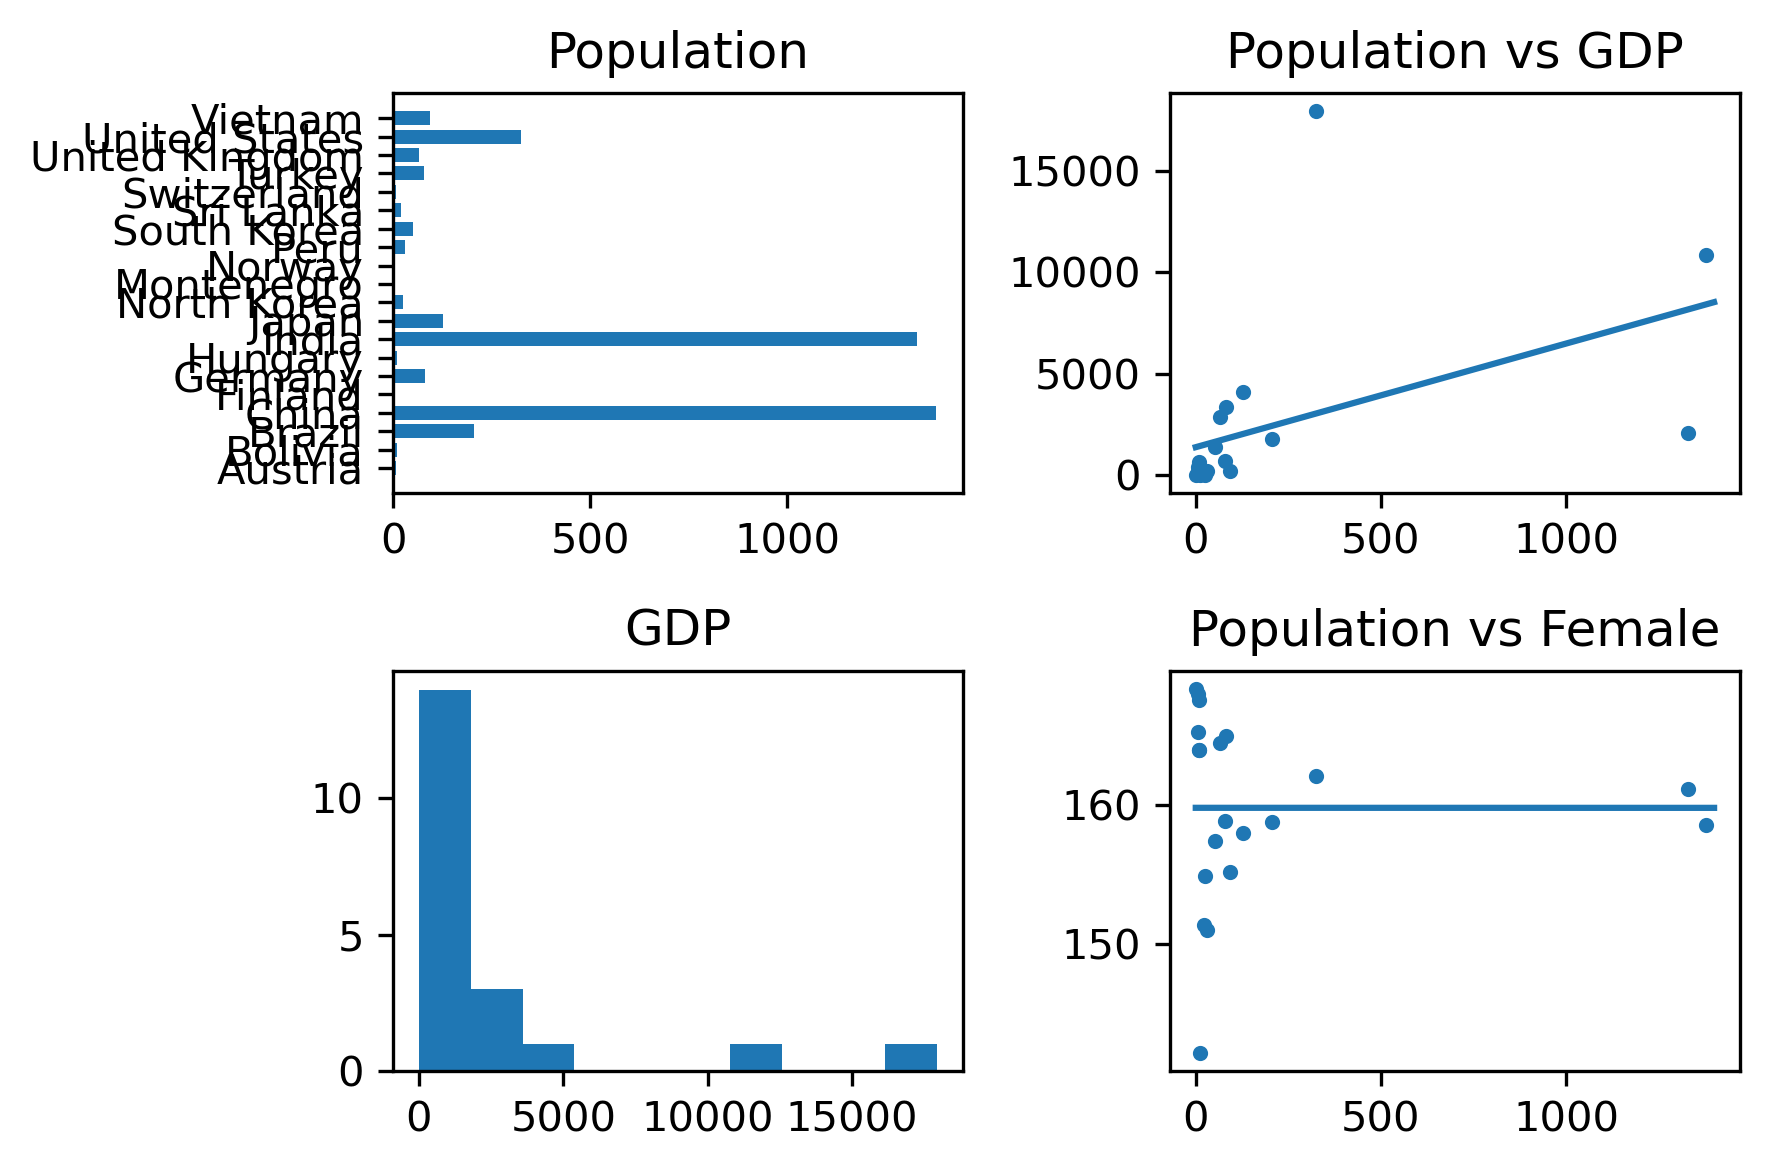

In [25]:
##PLOT GRAPHS
plt.subplot(2,2,2)
plt.title("Population vs GDP")
plt.scatter(population, gdp,  marker='o',s=7)
line = stats.linregress(population, gdp)
x = np.linspace(0,1400, 20)
f = lambda x: line[0]*x  + line[1]
plt.plot(x, f(x))
plt.tight_layout()

plt.subplot(2,2,1)
plt.title("Population")
x = np.linspace(0,20, len(countries))
plt.tight_layout()
plt.barh(x,population, tick_label=countries)

plt.subplot(2,2,3)
plt.title("GDP")
plt.tight_layout()
plt.hist(gdp)

plt.subplot(2,2,4)
plt.title("Population vs Female")
plt.scatter(population, female,  marker='o',s=7)
line = stats.linregress(population, female)
x = np.linspace(0,1400, 20)
f = lambda x: line[0]*x  + line[1]
plt.plot(x, f(x))
plt.tight_layout()
## WRITE COMMENTS
print("China Has a lot of people. \nLarger populations have greater GDPs.\nMost GDPs are below 5000 \nfemales dont have an effect on gpd.")
